<a href="https://colab.research.google.com/github/ardiusebenezer07/Machine-Learning/blob/main/EDA_diabetes_datasheet_Ardius_Ebenezer_1103210208ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang dibutuhkan untuk analisis data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import dataset dan modul scikit-learn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, explained_variance_score)

In [3]:
# Tahap 1: Memuat Dataset Diabetes
# Load dataset diabetes bawaan scikit-learn
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [4]:
# Konversi ke DataFrame untuk analisis lebih lanjut
feature_names = diabetes.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [5]:
# Tahap 2: Exploratory Data Analysis (EDA)
# Statistik deskriptif
print("Statistik Deskriptif:")
print(df.describe())

Statistik Deskriptif:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905

<Figure size 1500x1000 with 0 Axes>

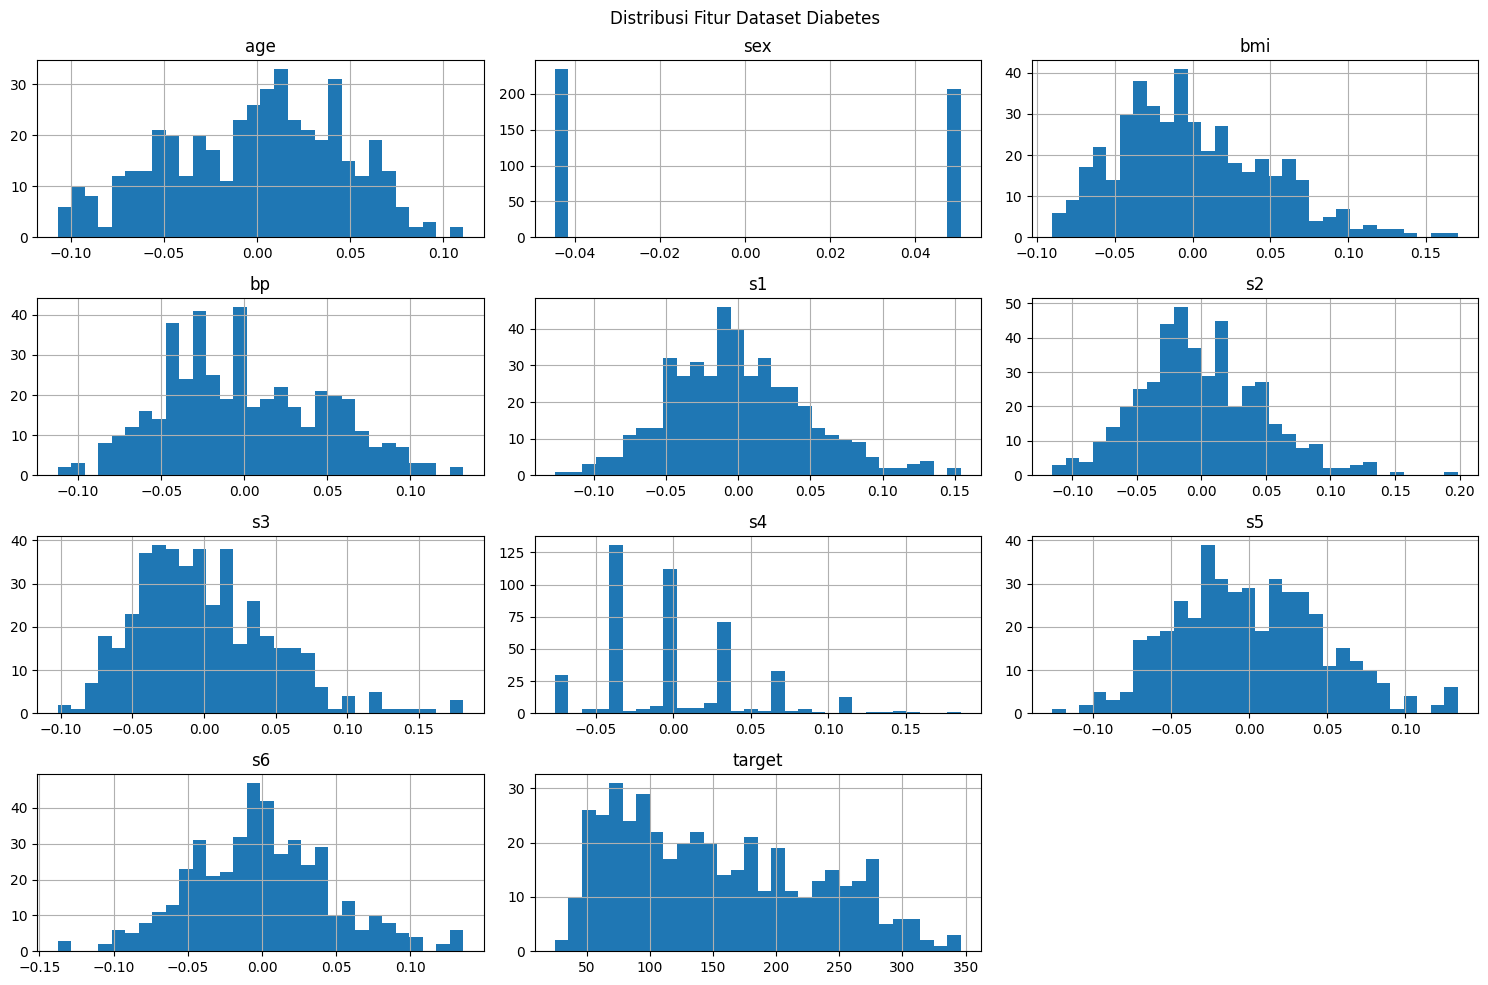

In [6]:
# Visualisasi distribusi variabel
plt.figure(figsize=(15, 10))
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Dataset Diabetes')
plt.tight_layout()
plt.show()

In [ ]:
# Korelasi antar fitur
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt='.2f'
)
plt.title('Matriks Korelasi Fitur Dataset Diabetes')
plt.tight_layout()
plt.show()

In [ ]:
# Scatter plot antara fitur dan target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.scatter(df[feature], df['target'], alpha=0.5)
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
plt.suptitle('Hubungan Fitur dengan Target')
plt.tight_layout()
plt.show()

In [ ]:
# Tahap 3: Persiapan Data
# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
# Tahap 4: Pemodelan Regresi
# Definisi model-model yang akan dibandingkan
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

In [ ]:
# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluasi Model {model_name}:")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"R-squared (R²): {r2_score(y_true, y_pred):.4f}")
    print(f"Explained Variance Score: {explained_variance_score(y_true, y_pred):.4f}\n")

In [ ]:
# Evaluasi setiap model
results = {}
for name, model in models.items():
    # Buat pipeline dengan scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

In [ ]:
# Latih model
pipeline.fit(X_train, y_train)

In [ ]:
# Prediksi
y_pred = pipeline.predict(X_test)

In [ ]:
# Simpan hasil
results[name] = y_pred

In [ ]:
# Evaluasi model
evaluate_model(y_test, y_pred, name)

In [ ]:
# Cross-validation untuk validasi tambahan
print("Cross-Validation Scores:")
for name, model in models.items():
    cv_scores = cross_val_score(
        model, X, y,
        scoring='neg_mean_squared_error',
        cv=5
    )
    print(f"{name} - Mean CV Score: {-cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

In [ ]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(15, 5))
for i, (name, y_pred) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'{name}: Prediksi vs Aktual')
    plt.xlabel('Nilai Aktual')
    plt.ylabel('Nilai Prediksi')
plt.tight_layout()
plt.show()